In [1]:
# 필요 패키지 로딩 
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# 원시 데이터 로드 
data_raw = pd.read_excel('재정의변수와코드북.xlsx', sheet_name='choice')

In [3]:
# 'A11_1 (좋아하는 밥의 종류(1순위))' 데이터 전처리 => 0:백미 / 1:잡곡밥
data_raw['A11_1'] = data_raw['A11_1'].map({1:0, 2:1, 3:1, 4:1})

# 'SQ1 (성별)' 데이터 전처리 => 0:남성 / 1:여성
data_raw['SQ1'] = data_raw['SQ1'].map({1:0, 2:1})

# 'BA4 (규칙적인 운동여부)' 데이터 전처리 => 0:아니다 / 1:그렇다
data_raw['BA4'] = data_raw['BA4'].map({1:1, 2:0})

# 'A4 (규칙적인 식사여부)' 데이터 전처리 => 0:아니다 / 1:그렇다
data_raw['A4'] = data_raw['A4'].map({1:1, 2:0})

print(data_raw['A11_1'].value_counts())
print(data_raw['SQ1'].value_counts())
print(data_raw['BA4'].value_counts())
print(data_raw['A4'].value_counts())

1    3163
0    3013
Name: A11_1, dtype: int64
1    3393
0    2783
Name: SQ1, dtype: int64
0    4115
1    2061
Name: BA4, dtype: int64
1    4677
0    1499
Name: A4, dtype: int64


In [4]:
# 상관성 검정 이후 채택된 변수들 리스트
select_list = [
    'A10_0', 'A19', 'A4', 'BA4', 'SQ1',
    'bk_regularly1', 'c6_10_1', 'c6_3_1', 'c6_5_2', 'c6_6_1',
    'c6_8_2', 'diet1', 'disease', 'eat_bk', 'eat_vfg1',
    'effect_job1', 'effect_rice1', 'expensive_buy2', 'family_eat1', 'family_important1',
    'h1_11_2', 'h1_13_1', 'h1_15_1', 'h1_1_1', 'h1_2_2', 'h1_3_1',
    'h1_4_2', 'h1_5_2', 'h1_6_2', 'h1_7_1', 'h1_8_2',
    'h1_9_1', 'health1', 'health_know2', 'home_dr', 'home_lh',
    'info_media', 'info_package', 'korean_food1', 'natural_helpful', 'package_look1',
    'package_yes2', 'rice_helpful1', 'safery_grain1', 'satisfy2', 'sns2',
    'solo_eat1', 'SQ2', 'pay'
]

len(select_list)

49

In [5]:
X = data_raw[select_list].copy()
y = data_raw[["A11_1"]].copy()

In [6]:
# 컬럼명 list로 저장 
col = list(X.columns)

In [7]:
# 특성 변수명 설정 
feature_names = col

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 

random_state = 3004

# 훈련, 테스트 셋 분류 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state, stratify=y) 

decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=17,
    random_state=random_state
)

# BaggingClassifier
bagging_classifier = BaggingClassifier(
    base_estimator=decision_tree,
    n_estimators=100,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False, 
    n_jobs=1,
    random_state=random_state
)

# AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(
    base_estimator=decision_tree,
    n_estimators=100,
    learning_rate=0.5,
    random_state=random_state
)

# GaussianNB
gnb = GaussianNB()

# GaussianNB
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=random_state,
    random_state=random_state,
) 

knn = KNeighborsClassifier(n_neighbors=3)

## 모델 학습 & 검정

In [9]:
# DecisionTreeClassifier 모델 사용 
decision_tree.fit(x_train, y_train)
y_train_pred = decision_tree.predict(x_train)
y_test_pred = decision_tree.predict(x_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print('* DecisionTree의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (tree_train, tree_test))
print(conf_matrix)
print(report)
print('-------------------------------------------------------')

# BaggingClassifier 모델 사용 
bagging_classifier.fit(x_train, y_train)
y_train_pred = bagging_classifier.predict(x_train)
y_test_pred = bagging_classifier.predict(x_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print('* Bagging의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (bag_train, bag_test))
print(conf_matrix)
print(report)
print('-------------------------------------------------------')

# AdaBoostClassifier 모델 사용
adaboost_classifier.fit(x_train, y_train)
y_train_pred2 = adaboost_classifier.predict(x_train)
y_test_pred2 = adaboost_classifier.predict(x_test)

ada_train = accuracy_score(y_train, y_train_pred2)
ada_test = accuracy_score(y_test, y_test_pred2)

conf_matrix = confusion_matrix(y_test, y_test_pred2)
report = classification_report(y_test, y_test_pred2)

print('* AdaBoost의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (ada_train, ada_test))
print(conf_matrix)
print(report)
print('-------------------------------------------------------')

# RandomForestClassifier 모델 사용 
rf_classifier.fit(x_train, y_train)
y_train_pred4 = rf_classifier.predict(x_train)
y_test_pred4 = rf_classifier.predict(x_test)

forest_train = accuracy_score(y_train, y_train_pred4)
forest_test = accuracy_score(y_test, y_test_pred4)

conf_matrix = confusion_matrix(y_test, y_test_pred4)
report = classification_report(y_test, y_test_pred4)

print('* Random Forest의 훈련 정확도/테스트 정확도 %.3f/%.3f' %(forest_train, forest_test))
print(conf_matrix)
print(report)
print('-------------------------------------------------------')

# KNeighborsClassifier 모델 사용 
knn.fit(x_train, y_train)
y_train_pred5 = knn.predict(x_train)
y_test_pred5 = knn.predict(x_test)

knn_train = accuracy_score(y_train, y_train_pred5)
knn_test = accuracy_score(y_test, y_test_pred5)

conf_matrix = confusion_matrix(y_test, y_test_pred5)
report = classification_report(y_test, y_test_pred5)

print('* KNN의 훈련 정확도/테스트 정확도 %.3f/%.3f' %(knn_train, knn_test))
print(conf_matrix)
print(report)

* DecisionTree의 훈련 정확도/테스트 정확도 0.959/0.578
[[432 321]
 [330 461]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       753
           1       0.59      0.58      0.59       791

    accuracy                           0.58      1544
   macro avg       0.58      0.58      0.58      1544
weighted avg       0.58      0.58      0.58      1544

-------------------------------------------------------


C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Bagging의 훈련 정확도/테스트 정확도 0.959/0.578
[[432 321]
 [330 461]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       753
           1       0.59      0.58      0.59       791

    accuracy                           0.58      1544
   macro avg       0.58      0.58      0.58      1544
weighted avg       0.58      0.58      0.58      1544

-------------------------------------------------------


C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* AdaBoost의 훈련 정확도/테스트 정확도 1.000/0.656
[[481 272]
 [259 532]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       753
           1       0.66      0.67      0.67       791

    accuracy                           0.66      1544
   macro avg       0.66      0.66      0.66      1544
weighted avg       0.66      0.66      0.66      1544

-------------------------------------------------------


C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


* Random Forest의 훈련 정확도/테스트 정확도 1.000/0.675
[[516 237]
 [265 526]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       753
           1       0.69      0.66      0.68       791

    accuracy                           0.67      1544
   macro avg       0.68      0.68      0.67      1544
weighted avg       0.68      0.67      0.67      1544

-------------------------------------------------------


C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


* KNN의 훈련 정확도/테스트 정확도 0.796/0.598
[[458 295]
 [325 466]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       753
           1       0.61      0.59      0.60       791

    accuracy                           0.60      1544
   macro avg       0.60      0.60      0.60      1544
weighted avg       0.60      0.60      0.60      1544



In [10]:
X_arr = X.values
y_arr = y.values

In [11]:
# K-fold를 적용한 모델의 테스트 정확도 측정

from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance

arr1 = np.array([])
arr2 = np.array([])
arr3 = np.array([])
arr4 = np.array([])
arr5 = np.array([])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

for train_index, test_index in skf.split(X_arr, y):
    
    x_train, x_test = X_arr[train_index], X_arr[test_index]
    y_train, y_test = y_arr[train_index], y_arr[test_index]

    # DecisionTreeClassifier 모델 사용 
    tree = tree.fit(x_train, y_train)
    y_test_pred = tree.predict(x_test)

    tree_test = accuracy_score(y_test, y_test_pred)

    arr1 = np.append(arr1, np.array([tree_test]))
    
    # AdaBoostClassifier 모델 사용
    adaboost_classifier = adaboost_classifier.fit(x_train, y_train)
    y_test_pred = adaboost_classifier.predict(x_test)

    ada_test = accuracy_score(y_test, y_test_pred)

    arr2 = np.append(arr2, np.array([ada_test]))
    
    # BaggingClassifier 모델 사용 
    bagging_classifier = bagging_classifier.fit(x_train, y_train)
    y_test_pred = tree.predict(x_test)

    bag_test = accuracy_score(y_test, y_test_pred)
    
    arr3 = np.append(arr3, np.array([forest_test]))
    
    # RandomForestClassifier 모델 사용
    rf_classifier.fit(x_train, y_train)
    y_test_pred = rf_classifier.predict(x_test)

    forest_test = accuracy_score(y_test, y_test_pred)    

    arr4 = np.append(arr4, np.array([forest_test]))    

    # KNeighborsClassifier 모델 사용 
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)

    knn_test = accuracy_score(y_test, y_test_pred)

    arr5 = np.append(arr5, np.array([knn_test]))

print('* DecisionTree의 K-fold 평균 테스트 정확도 %.3f' % (arr1.mean()))
print('* AdaBoost의 K-fold 평균 테스트 정확도 %.3f' % (arr2.mean()))
print('* bag_test의 K-fold 평균 테스트 정확도 %.3f' % (arr3.mean()))
print('* Random Forest의 K-fold 평균 테스트 정확도 %.3f' % (arr4.mean()))
print('* KNN의 K-fold 평균 테스트 정확도 %.3f' % (arr5.mean()))

C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

* DecisionTree의 K-fold 평균 테스트 정확도 0.568
* AdaBoost의 K-fold 평균 테스트 정확도 0.651
* bag_test의 K-fold 평균 테스트 정확도 0.666
* Random Forest의 K-fold 평균 테스트 정확도 0.663
* KNN의 K-fold 평균 테스트 정확도 0.593


## 변수 특성 중요도 평가

In [12]:
import eli5
from eli5.sklearn import PermutationImportance

def plot_feature_importances_rice(model, name):
    plt.figure(figsize=(12, 12))
    n_features = len(feature_names)
    ax = plt.barh(range(n_features), model.feature_importances_, align='center')
    #plt.yticks(np.arange(n_features), feature_names, size = 13, rotation=30)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.title(name)
    for i, ax in enumerate(ax):
        plt.text(ax.get_width(), ax.get_y() + ax.get_height() / 2.0, str(feature_names[i]), ha='left', va='center')
    
def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state, stratify=y) 

C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


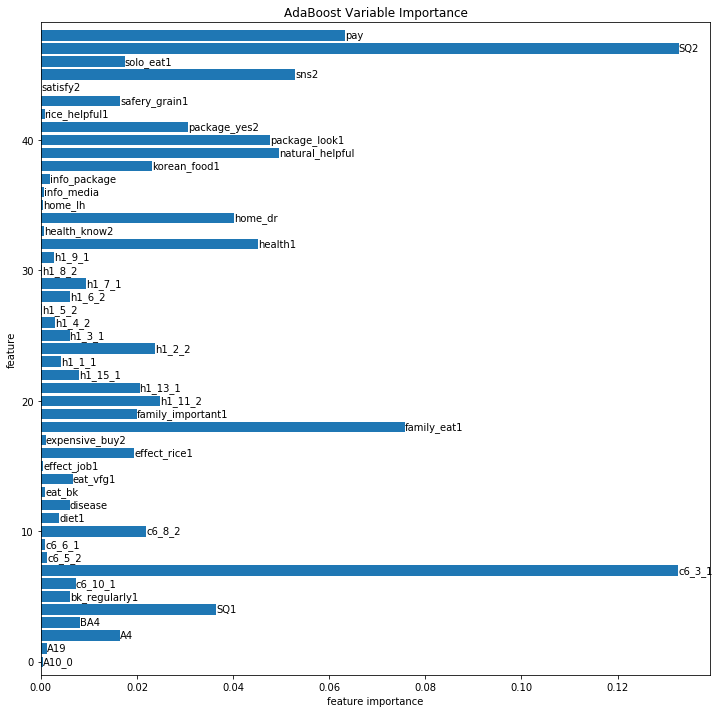

In [13]:
# 에이다부스트 변수 특성 중요도 그래프 생성
plot_feature_importances_rice(adaboost_classifier, 'AdaBoost Variable Importance')

In [14]:
# 에이다부스트 변수 특성 중요도 permutation_importances
perm = PermutationImportance(adaboost_classifier, scoring="f1", random_state=random_state).fit(x_test, y_test)
eli5.show_weights(perm, top=80, feature_names=x_train.columns.tolist())

Weight,Feature
0.0483 ± 0.0090,SQ2
0.0143 ± 0.0052,pay
0.0129 ± 0.0099,c6_3_1
0.0062 ± 0.0024,package_look1
0.0053 ± 0.0022,c6_8_2
0.0041 ± 0.0032,package_yes2
0.0026 ± 0.0032,SQ1
0.0025 ± 0.0025,info_package
0.0020 ± 0.0032,h1_3_1
0.0018 ± 0.0030,natural_helpful


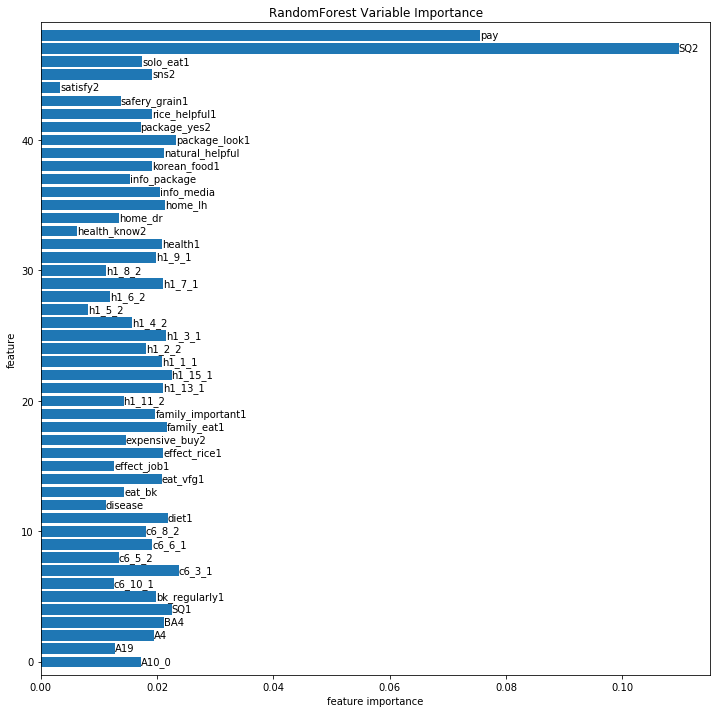

In [15]:
# 랜덤포레스트 변수 특성 중요도 그래프 생성
plot_feature_importances_rice(rf_classifier, 'RandomForest Variable Importance')

In [16]:
# 랜덤포레스트 변수 특성 중요도 그래프 생성
perm = PermutationImportance(rf_classifier, scoring = "f1", random_state = random_state).fit(x_test, y_test)
eli5.show_weights(perm, top = 80, feature_names = x_train.columns.tolist())

Weight,Feature
0.0342 ± 0.0070,package_look1
0.0271 ± 0.0089,SQ2
0.0094 ± 0.0048,sns2
0.0094 ± 0.0038,effect_rice1
0.0093 ± 0.0036,bk_regularly1
0.0089 ± 0.0049,pay
0.0089 ± 0.0016,A4
0.0051 ± 0.0029,c6_3_1
0.0041 ± 0.0030,diet1
0.0039 ± 0.0016,solo_eat1
